In [7]:
%pip install langchain_openai langchain_core langgraph python-dotenv


     ---------------------------------------- 50.4/50.4 kB 2.5 MB/s eta 0:00:00
     ------------------------------------- 389.6/389.6 kB 12.2 MB/s eta 0:00:00
     ------------------------------------- 884.5/884.5 kB 18.6 MB/s eta 0:00:00
     ---------------------------------------- 78.6/78.6 kB ? eta 0:00:00
     ------------------------------------- 274.1/274.1 kB 16.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import os, getpass

def _set_env(var:str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

_set_env("OPENAI_API_KEY")


In [ ]:
from langchain_openai import ChatOpenAI

def multiply(x:int, y:int):
    """Multiply a and b.

    Args:
        x: first int
        y: second int
    """    
    return x*y  

llm = ChatOpenAI(model="gpt-4o") 

llm_with_tools = llm.bind_tools([multiply])


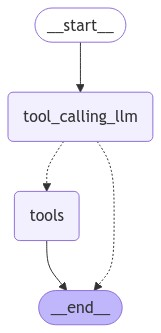

In [19]:
from langgraph.graph import MessagesState
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition
from IPython.display import Image, display

def tool_calling_llm(state: MessagesState):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

builder = StateGraph(MessagesState)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode([multiply]))
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges("tool_calling_llm",tools_condition)
builder.add_edge("tools", END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))




In [21]:
from langchain_core.messages import HumanMessage

messages = [HumanMessage(content="if i have 3 apples in 132 baskets, how many apples do i have?")]
messages = graph.invoke({"messages": messages}) 
for m in messages['messages']:
    m.pretty_print()


================================ Human Message =================================

if i have 3 apples in 132 baskets, how many apples do i have?
================================== Ai Message ==================================
Tool Calls:
  multiply (call_N1PecmEUtR0V8nrqhNwdvrWc)
 Call ID: call_N1PecmEUtR0V8nrqhNwdvrWc
  Args:
    x: 3
    y: 132
================================= Tool Message =================================
Name: multiply

396
